In [2]:
import joblib
import warnings
import numpy as np
import pandas as pd
import utils.plot as custom_plt
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from IPython.core.interactiveshell import InteractiveShell

In [6]:
plt.rc('font', family='GULIM')
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [7]:
df = pd.read_csv('Database/rainfall_train.csv', index_col=0)
df_test = pd.read_csv('Database/rainfall_test.csv', index_col=0)

In [8]:
mask = df['rainfall_train.class_interval'] == -999
df = df[~mask]

In [9]:
mask2 = df['rainfall_train.class_interval'] == 0

In [ ]:
custom_plt.plot_continuous_variable(df, 'rainfall_train.vv', 'kde', True, True)

In [ ]:
for i in range(20):
    aws = df['rainfall_train.stn4contest'].unique().tolist()
    mask = (df['rainfall_train.fc_month'] == 5) & (df['rainfall_train.stn4contest'] == f'{aws[i]}')
    df_boxcox = pd.Series(stats.boxcox(df[mask]['rainfall_train.vv'] + 0.000001)[0])
    df_log = pd.DataFrame(df[mask]['rainfall_train.vv']).applymap(lambda x: np.log(x + 1))
    print(f'{aws[i]}')
    print(df_boxcox.skew())

In [4]:
X_test = pd.read_csv('Database/test/X_self_test_norm.csv', index_col=0)
y_test = pd.read_csv('Database/test/y_self_test.csv', index_col=0)
self_test=pd.concat([X_test, y_test], axis=1)

In [9]:
gmm = GaussianMixture(n_components=3, max_iter=1000, init_params='k-means++', random_state=42)
gmm.fit(self_test)

GaussianMixture(init_params='k-means++', max_iter=1000, n_components=3,
                random_state=42)

In [10]:
joblib.dump(gmm, 'Database/gmm_model.pkl')

['Database/gmm_model.pkl']

In [26]:
# BIC 스코어를 저장할 리스트를 초기화합니다.
bic_scores = []

# 클러스터 개수의 범위를 설정합니다.
cluster_range = range(1, 21)

# 각 클러스터 개수에 대해 GMM을 적합시키고 BIC 스코어를 계산합니다.
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, init_params='k-means++', random_state=42)
    gmm.fit(self_test)
    bic = gmm.bic(self_test)
    bic_scores.append(bic)
    print(f'Cluster count: {n_clusters}, BIC: {bic}')

# 최적의 클러스터 개수를 선택합니다.
optimal_clusters = cluster_range[np.argmin(bic_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

# BIC 스코어를 시각화합니다.
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, bic_scores, marker='o')
plt.title('BIC Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()

GaussianMixture(init_params='k-means++', random_state=42)

Cluster count: 1, BIC: -6948157.661413293


GaussianMixture(init_params='k-means++', n_components=2, random_state=42)

Cluster count: 2, BIC: -15693136.880720615


GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

Cluster count: 3, BIC: -32816152.903879322


GaussianMixture(init_params='k-means++', n_components=4, random_state=42)

Cluster count: 4, BIC: -38166143.44337646


GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

Cluster count: 5, BIC: -38592416.364277005


GaussianMixture(init_params='k-means++', n_components=6, random_state=42)

Cluster count: 6, BIC: -41744356.122960724


GaussianMixture(init_params='k-means++', n_components=7, random_state=42)

Cluster count: 7, BIC: -41725500.002784654


GaussianMixture(init_params='k-means++', n_components=8, random_state=42)

Cluster count: 8, BIC: -44312861.70784456


GaussianMixture(init_params='k-means++', n_components=9, random_state=42)

Cluster count: 9, BIC: -46101188.09087579


GaussianMixture(init_params='k-means++', n_components=10, random_state=42)

Cluster count: 10, BIC: -46651826.61049681


GaussianMixture(init_params='k-means++', n_components=11, random_state=42)

Cluster count: 11, BIC: -49124357.87284247


GaussianMixture(init_params='k-means++', n_components=12, random_state=42)

Cluster count: 12, BIC: -50185832.82612471


GaussianMixture(init_params='k-means++', n_components=13, random_state=42)

Cluster count: 13, BIC: -50545050.61573802


GaussianMixture(init_params='k-means++', n_components=14, random_state=42)

Cluster count: 14, BIC: -50576877.759511635



KeyboardInterrupt



In [18]:
GMM = joblib.load('Database/gmm_model.pkl')

In [19]:
test = pd.concat([self_test, pd.DataFrame(GMM.predict(self_test), index=self_test.index)], axis=1)

In [ ]:
custom_plt.plot_imabalance(test, 'rainfall_train.class_interval')

0


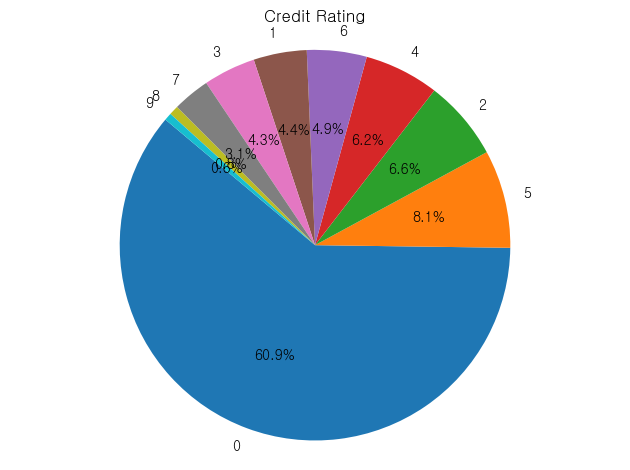

1


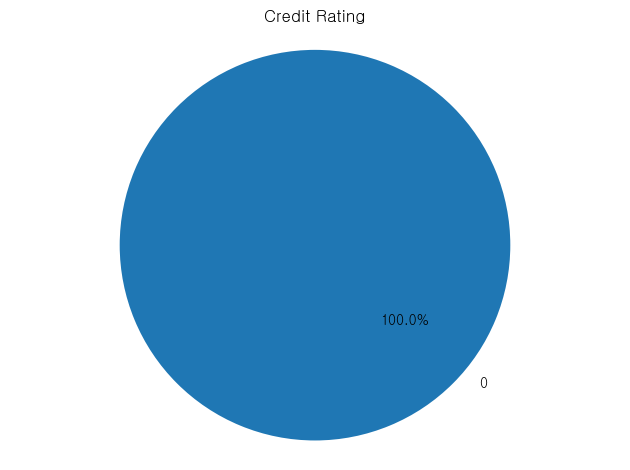

2


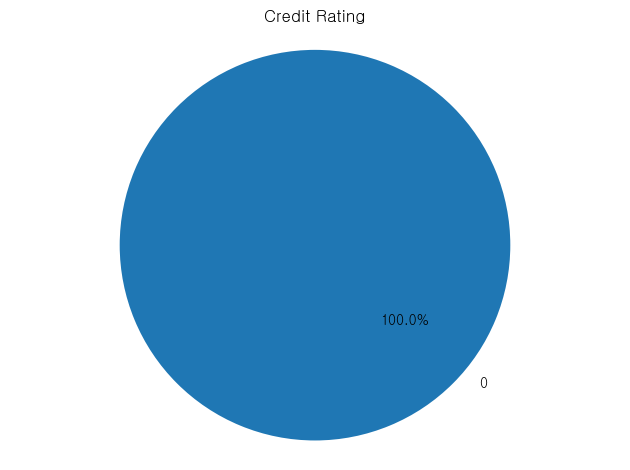

3


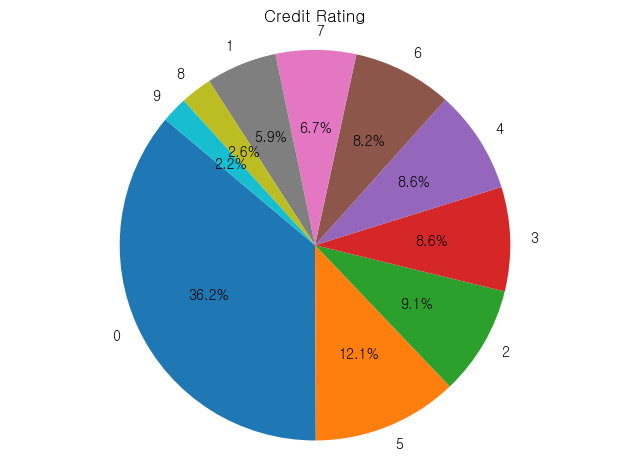

4


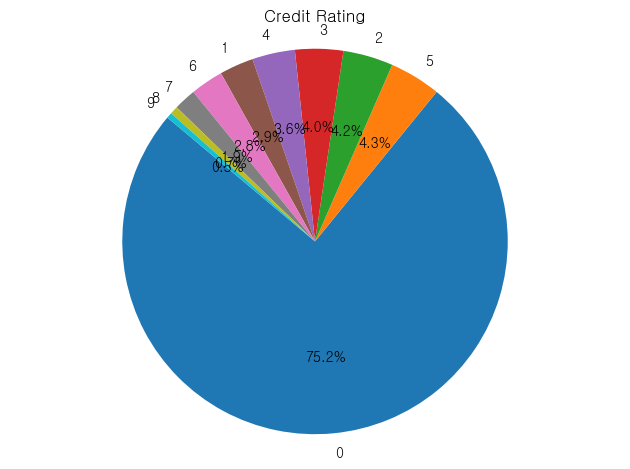

5


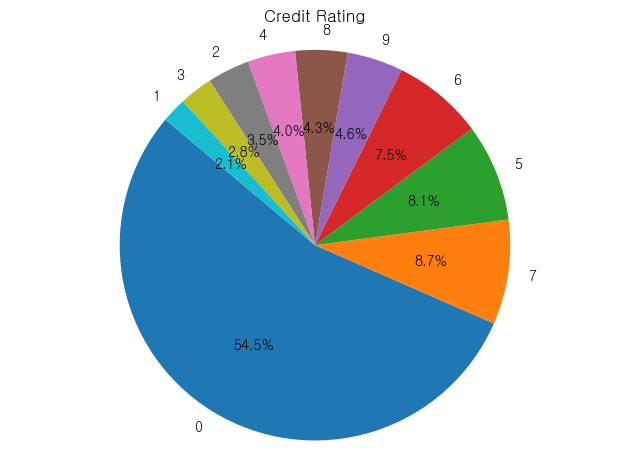

6


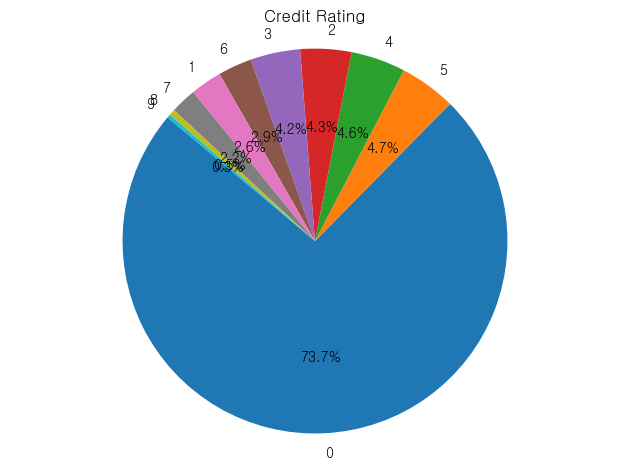

7


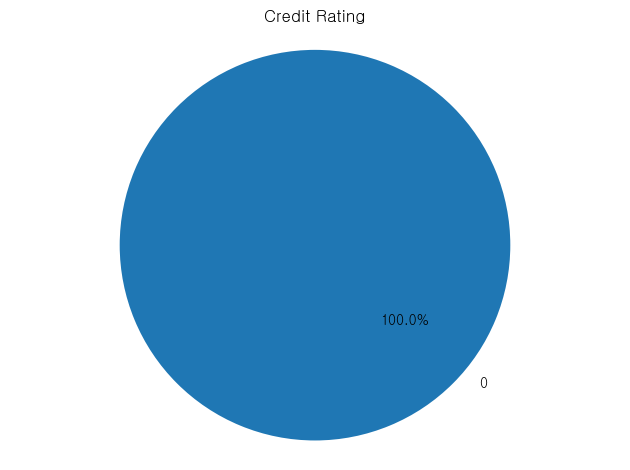

8


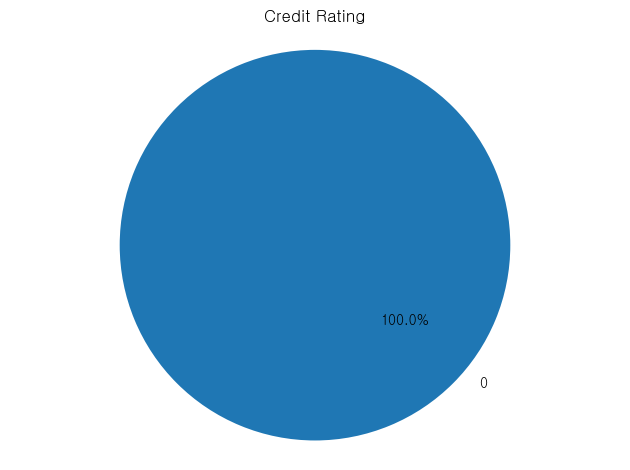

9


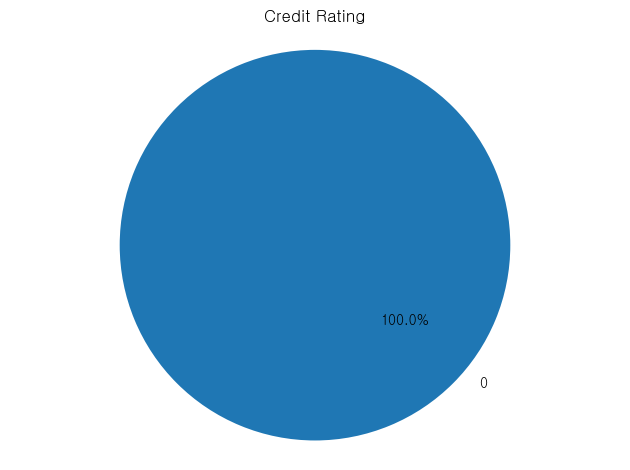

10


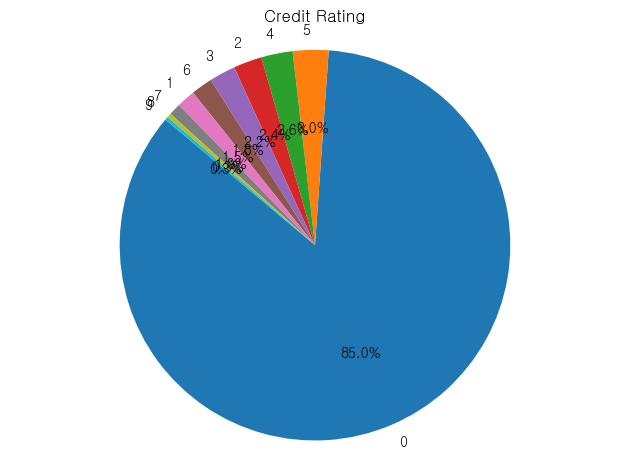

11


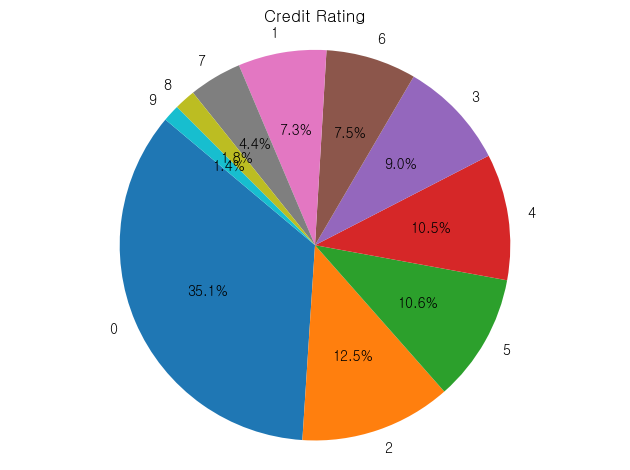

12


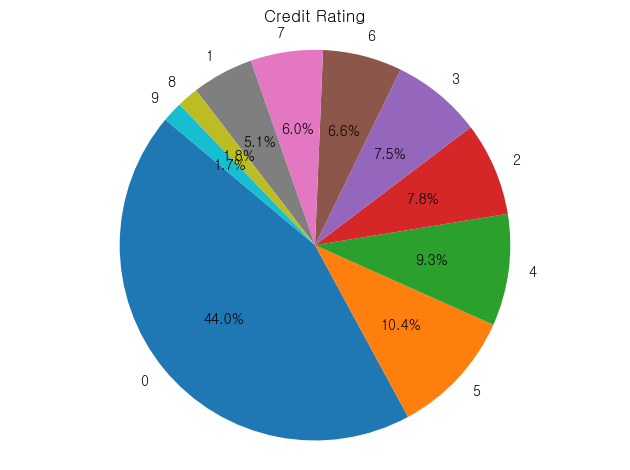

13


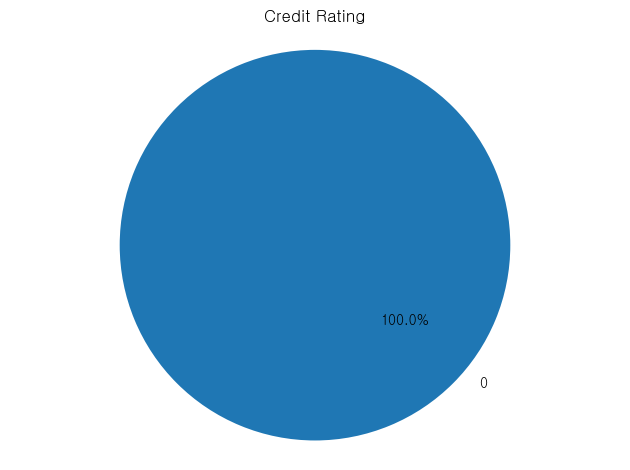

14


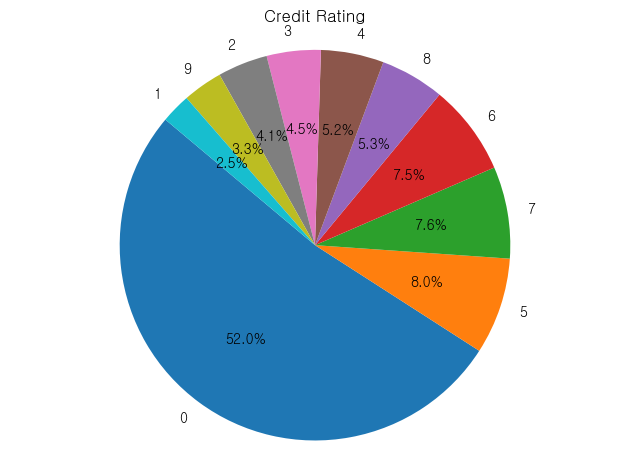

In [25]:
for i in range(15):
    print(i)
    custom_plt.plot_imabalance(test[test[0]==i], 'rainfall_train.class_interval')